# Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

 

Note: You can find the dataset in the link below. 



Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor 
import pickle #to save the data
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_excel('Data_Train.xlsx')
data_test= pd.read_excel('Test_set.xlsx')

In [3]:
print('**********Train Data**********')
print(data_train.head())
print(' ')
print(' ')
print('**********Test Data**********')
print(data_test.head())

**********Train Data**********
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  
 
 
**********Test Data**********
             Airline Date_of_Journ

In [4]:
print(data_train.shape)
print(data_test.shape)

(10683, 11)
(2671, 10)


We can see that that rain data has 10683 rows and 11 columns

where as train data has 2671 rows and 10 columns

In [5]:
print('Train Data')
print(data_train.dtypes)
print('')
print('')
print('')
print('Test Data')
print(data_test.dtypes)

Train Data
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object



Test Data
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object


We can see all the columns are matching only the price column is not available in test data

In [6]:
print('Test Data')
print(data_train.columns)
print('')
print('')
print('')
print('Test Data')
print(data_test.columns)

Test Data
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')



Test Data
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


we can see all the columns are common in both test and train data other than price column missing in test data 

#Combine both Test and Train data


In [7]:
data_train['New']="Train"
data_test['New']="Test"
data = pd.concat([data_train,data_test],ignore_index=True)
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,New
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,Train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,Train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,Train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,Test
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,Test
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,Test
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,Test


we can se after combinaning test and train data we have total of 13354 Rows and 12 Columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  New              13354 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.2+ MB


In [9]:
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
New                   0
dtype: int64

as the test  data of Flight price prediction is blank so its showing 2671 as null and the other 2 columns 'Route' & 'Total_stops' having 1 null value 

we have only 1 column with numerical value

In [10]:
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
New                   0
dtype: int64

In [11]:
#As the data is object type so we gonna use mode to fill null values

In [12]:
data['Route']=data['Route'].fillna(data['Route'].mode()[0])
data['Total_Stops']=data['Total_Stops'].fillna(data['Total_Stops'].mode()[0])

In [13]:
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
New                   0
dtype: int64

Lets check the unique values and see if there any same name columns repeated

In [14]:
data['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

we see there are 3 airways which has divided into 2 different section, lets merge them 

In [15]:
data["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)
data["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
data["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [16]:
data['Airline'].value_counts()

Jet Airways          4754
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Trujet                  1
Name: Airline, dtype: int64

we see there are no extra columns with same names 

In [17]:
data['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [18]:
data["Additional_Info"].replace("No info","No Info",inplace=True)
data["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)
data["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

As the secound feature and some othr related feature is about time and date , will convert then into correct time format so we give some understanding specific value so our model can understand 

In [19]:
# changinf the data type to date time 
def datetime(col):
    data[col]=pd.to_datetime(data[col])

In [20]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    datetime(i)
print(data.dtypes)

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
New                        object
dtype: object


In [21]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,New
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-08-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No Info,3897.0,Train
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-28 05:50:00,2022-08-28 13:15:00,7h 25m,2 stops,No Info,7662.0,Train


In [22]:
# as we can see date of  (Date_of_Journey) is not syn with Dep_Time,Arrival_Time so we gonna only consider day and month of both both the feature of Arrival_Timeand Dep_Time.
# we are not considering year in the column of Date_of_Journey as we got only 1 unique year 
# we will drop the sets
data['day']=data['Date_of_Journey'].dt.day
data['month']=data['Date_of_Journey'].dt.month
data['Dep_hour']=data['Dep_Time'].dt.hour
data['Dep_min']=data['Dep_Time'].dt.minute
data['Arrival_hour']=data['Arrival_Time'].dt.hour
data['Arrival_minute']=data['Arrival_Time'].dt.minute
data.drop(['Date_of_Journey'],axis = 1, inplace = True)
data.drop(['Arrival_Time'],axis = 1, inplace = True)
data.drop(['Dep_Time'],axis = 1, inplace = True)


In [23]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,New,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No Info,3897.0,Train,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No Info,7662.0,Train,5,1,5,50,13,15


In [24]:
print(data['Source'].value_counts())

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64


There are no extended columns with same state in source 

In [25]:
print(data['Destination'].value_counts())

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64


delhi and new delhi belongs to same state so lets make it single column 

In [26]:
data['Destination']=data['Destination'].replace('New Delhi','Delhi')

In [27]:
print(data.Route.value_counts())

DEL → BOM → COK                3001
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → JLR → HYD                   1
BOM → NDC → HYD                   1
BOM → COK → MAA → HYD             1
BOM → JDH → JAI → DEL → HYD       1
BOM → IXC → DEL → HYD             1
Name: Route, Length: 132, dtype: int64


In [28]:
#route has 132 columns and higest number of routes is 5 i.e BOM → JDH → JAI → DEL → HYD , so we gonna mae 5 different routes and drop route column 
data['Route1']=data['Route'].str.split('→').str[0]
data['Route2']=data['Route'].str.split('→').str[1]
data['Route3']=data['Route'].str.split('→').str[2]
data['Route4']=data['Route'].str.split('→').str[3]
data['Route5']=data['Route'].str.split('→').str[4]
data.drop(['Route',],axis = 1, inplace = True)

In [29]:
# as we have made 5 different route so many column will have na values in the routes so lets check and fill it with some value 
data.isnull().sum()

Airline                0
Source                 0
Destination            0
Duration               0
Total_Stops            0
Additional_Info        0
Price               2671
New                    0
day                    0
month                  0
Dep_hour               0
Dep_min                0
Arrival_hour           0
Arrival_minute         0
Route1                 0
Route2                 0
Route3              4340
Route4             11397
Route5             13296
dtype: int64

In [30]:
data['Route3']=data['Route3'].fillna('NA')
data['Route4']=data['Route4'].fillna('NA')
data['Route5']=data['Route5'].fillna('NA')

In [31]:
data['Route1'].unique()

array(['BLR ', 'CCU ', 'DEL ', 'MAA ', 'BOM '], dtype=object)

In [32]:
ord_enc=OrdinalEncoder(categories=[['BLR ', 'CCU ', 'DEL ', 'MAA ', 'BOM ']])
df1=ord_enc.fit_transform(data[['Route1']])
print(df1)
data['Route1']=df1

[[0.]
 [1.]
 [2.]
 ...
 [2.]
 [2.]
 [2.]]


In [33]:
data['Route2'].unique()

array([' DEL', ' IXR ', ' LKO ', ' NAG ', ' BLR', ' BOM ', ' BLR ',
       ' CCU', ' AMD ', ' PNQ ', ' CCU ', ' COK ', ' IDR ', ' GAU ',
       ' MAA ', ' HYD ', ' COK', ' DEL ', ' HYD', ' BHO ', ' JAI ',
       ' ATQ ', ' JDH ', ' BBI ', ' GOI ', ' BDQ ', ' TRV ', ' IXU ',
       ' IXB ', ' UDR ', ' RPR ', ' DED ', ' VGA ', ' VNS ', ' IXC ',
       ' PAT ', ' JLR ', ' KNU ', ' GWL ', ' VTZ ', ' NDC ', ' IXZ ',
       ' HBX ', ' IXA ', ' STV '], dtype=object)

In [34]:
ord_enc=OrdinalEncoder(categories=[[' DEL', ' IXR ', ' LKO ', ' NAG ', ' BLR', ' BOM ', ' BLR ',
       ' CCU', ' AMD ', ' PNQ ', ' CCU ', ' COK ', ' IDR ', ' GAU ',
       ' MAA ', ' HYD ', ' COK', ' DEL ', ' HYD', ' BHO ', ' JAI ',
       ' ATQ ', ' JDH ', ' BBI ', ' GOI ', ' BDQ ', ' TRV ', ' IXU ',
       ' IXB ', ' UDR ', ' RPR ', ' DED ', ' VGA ', ' VNS ', ' IXC ',
       ' PAT ', ' JLR ', ' KNU ', ' GWL ', ' VTZ ', ' NDC ', ' IXZ ',
       ' HBX ', ' IXA ', ' STV ']])
df1=ord_enc.fit_transform(data[['Route2']])
print(df1)
data['Route2']=df1

[[0.]
 [1.]
 [2.]
 ...
 [5.]
 [5.]
 [5.]]


In [35]:
data['Route3'].unique()

array(['NA', ' BBI ', ' BOM ', ' BLR', ' DEL', ' COK', ' DEL ', ' AMD ',
       ' HYD', ' JDH ', ' MAA ', ' COK ', ' GOI ', ' NAG ', ' GAU ',
       ' BHO ', ' IXR ', ' IDR ', ' ISK ', ' HYD ', ' VGA ', ' PNQ ',
       ' JAI ', ' TRV ', ' HBX ', ' IMF ', ' CCU ', ' UDR ', ' VTZ ',
       ' IXC ', ' TIR '], dtype=object)

In [36]:
ord_enc=OrdinalEncoder(categories=[['NA', ' BBI ', ' BOM ', ' BLR', ' DEL', ' COK', ' DEL ', ' AMD ',
       ' HYD', ' JDH ', ' MAA ', ' COK ', ' GOI ', ' NAG ', ' GAU ',
       ' BHO ', ' IXR ', ' IDR ', ' ISK ', ' HYD ', ' VGA ', ' PNQ ',
       ' JAI ', ' TRV ', ' HBX ', ' IMF ', ' CCU ', ' UDR ', ' VTZ ',
       ' IXC ', ' TIR ']])
df1=ord_enc.fit_transform(data[['Route3']])
print(df1)
data['Route3']=df1

[[0.]
 [1.]
 [2.]
 ...
 [5.]
 [5.]
 [5.]]


In [37]:
data['Route4'].unique()

array(['NA', ' BLR', ' COK', ' DEL', ' BOM ', ' HYD', ' DEL ', ' HYD ',
       ' GWL ', ' TRV ', ' BBI ', ' BHO ', ' AMD ', ' NAG '], dtype=object)

In [38]:
ord_enc=OrdinalEncoder(categories=[['NA', ' BLR', ' COK', ' DEL', ' BOM ', ' HYD', ' DEL ', ' HYD ',
       ' GWL ', ' TRV ', ' BBI ', ' BHO ', ' AMD ', ' NAG ']])
df1=ord_enc.fit_transform(data[['Route4']])
print(df1)
data['Route4']=df1

[[0.]
 [1.]
 [2.]
 ...
 [0.]
 [0.]
 [0.]]


In [39]:
data['Route5'].unique()

array(['NA', ' COK', ' BLR', ' DEL', ' HYD', ' VGA '], dtype=object)

In [40]:
ord_enc=OrdinalEncoder(categories=[['NA', ' COK', ' BLR', ' DEL', ' HYD', ' VGA ']])
df1=ord_enc.fit_transform(data[['Route5']])
print(df1)
data['Route5']=df1

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [41]:
data.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
New                   0
day                   0
month                 0
Dep_hour              0
Dep_min               0
Arrival_hour          0
Arrival_minute        0
Route1                0
Route2                0
Route3                0
Route4                0
Route5                0
dtype: int64

In [42]:
data.dtypes

Airline             object
Source              object
Destination         object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
New                 object
day                  int64
month                int64
Dep_hour             int64
Dep_min              int64
Arrival_hour         int64
Arrival_minute       int64
Route1             float64
Route2             float64
Route3             float64
Route4             float64
Route5             float64
dtype: object

In [43]:
# we have one more column Duration which has total time taken for travelling so here we gonna divide it by 60 and count total number of minutes 
data['Duration'] = (pd.to_timedelta(data['Duration']).dt.seconds // 60)

In [44]:
data['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
13349    1435
13350     155
13351     395
13352     915
13353     860
Name: Duration, Length: 13354, dtype: int64

In [45]:
#data type is integer converting it into float 
data['Duration'] = data['Duration'].astype(float)
data['Duration']

0         170.0
1         445.0
2        1140.0
3         325.0
4         285.0
          ...  
13349    1435.0
13350     155.0
13351     395.0
13352     915.0
13353     860.0
Name: Duration, Length: 13354, dtype: float64

In [46]:
print(data['Total_Stops'].value_counts())

1 stop      7057
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64


we have 5 stops 

In [47]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [48]:
ord_enc=OrdinalEncoder(categories=[['non-stop', '2 stops', '1 stop', '3 stops', '4 stops']])
df1=ord_enc.fit_transform(data[['Total_Stops']])
print(df1)
data['Total_Stops']=df1

[[0.]
 [1.]
 [1.]
 ...
 [2.]
 [2.]
 [2.]]


In [49]:
data['Total_Stops'].unique()

array([0., 1., 2., 3., 4.])

In [50]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,New,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,Delhi,170.0,0.0,No Info,3897.0,Train,24,3,22,20,1,10,0.0,0.0,0.0,0.0,0.0
1,Air India,Kolkata,Banglore,445.0,1.0,No Info,7662.0,Train,5,1,5,50,13,15,1.0,1.0,1.0,1.0,0.0


In [51]:
data.dtypes

Airline             object
Source              object
Destination         object
Duration           float64
Total_Stops        float64
Additional_Info     object
Price              float64
New                 object
day                  int64
month                int64
Dep_hour             int64
Dep_min              int64
Arrival_hour         int64
Arrival_minute       int64
Route1             float64
Route2             float64
Route3             float64
Route4             float64
Route5             float64
dtype: object

In [52]:
data.nunique()

Airline               9
Source                5
Destination           5
Duration            286
Total_Stops           5
Additional_Info       8
Price              1870
New                   2
day                   9
month                 7
Dep_hour             24
Dep_min              12
Arrival_hour         24
Arrival_minute       12
Route1                5
Route2               45
Route3               31
Route4               14
Route5                6
dtype: int64

Jet Airways          4754
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Trujet                  1
Name: Airline, dtype: int64


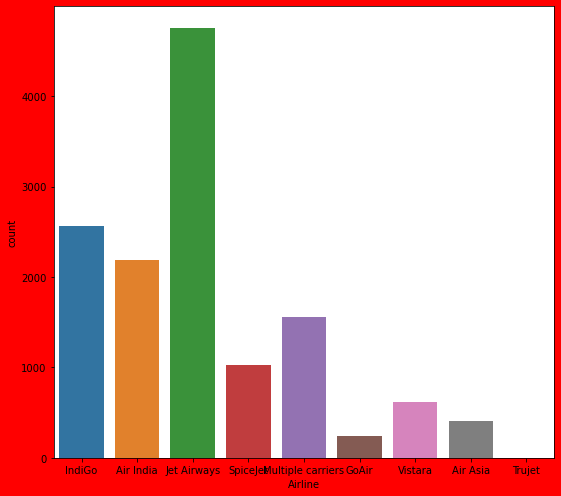

In [53]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Airline']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Airline'])
    plotnumber += 1
plt.tight_layout()
print(data['Airline'].value_counts())

Jet Airways have highest where as Trujet has the most lowest value 

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64


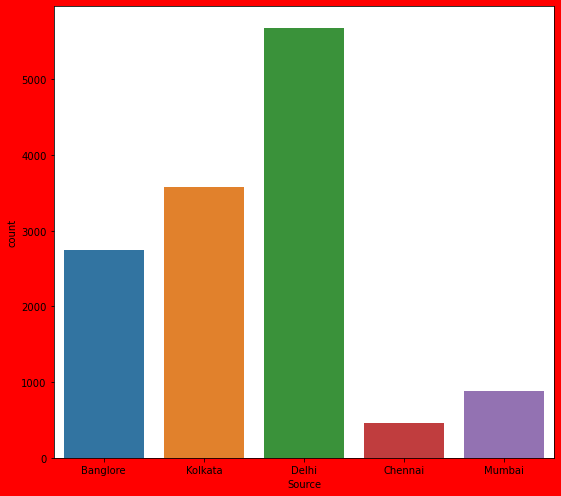

In [54]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Source']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Source'])
    plotnumber += 1
plt.tight_layout()
print(data['Source'].value_counts())

Delhi have highest where as Chennai has the most lowest value 

Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64


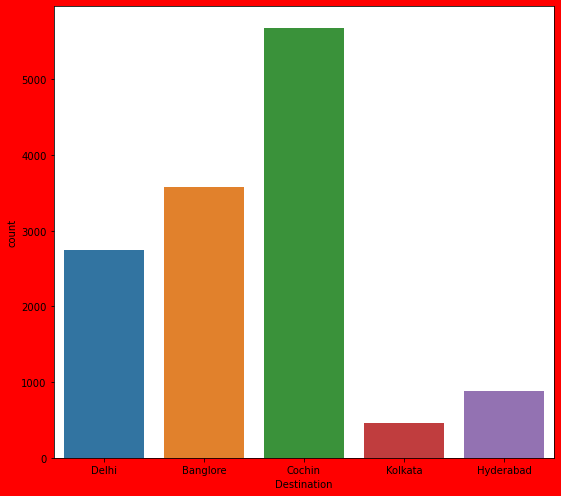

In [55]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Destination']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Destination'])
    plotnumber += 1
plt.tight_layout()
print(data['Destination'].value_counts())

Cochin have highest where as Kolkata  has the most lowest value 

2.0    7057
0.0    4340
1.0    1899
3.0      56
4.0       2
Name: Total_Stops, dtype: int64


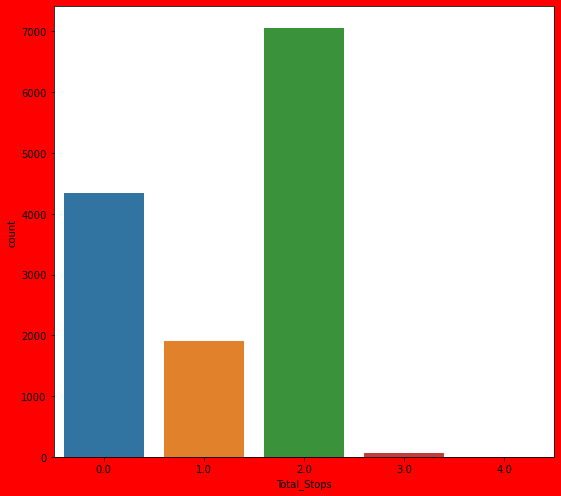

In [56]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Total_Stops']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Total_Stops'])
    plotnumber += 1
plt.tight_layout()
print(data['Total_Stops'].value_counts())

No Info                         10496
In-flight meal not included      2426
No check-in baggage included      396
Long layover                       21
Change airports                     8
Business class                      5
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64


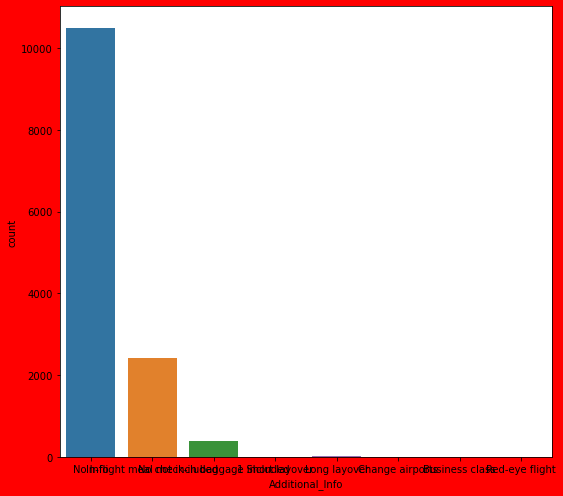

In [57]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Additional_Info']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Additional_Info'])
    plotnumber += 1
plt.tight_layout()
print(data['Additional_Info'].value_counts())

6     2727
5     1766
3     1739
21    1368
27    1350
24    1307
15    1251
18    1036
4      810
Name: day, dtype: int64


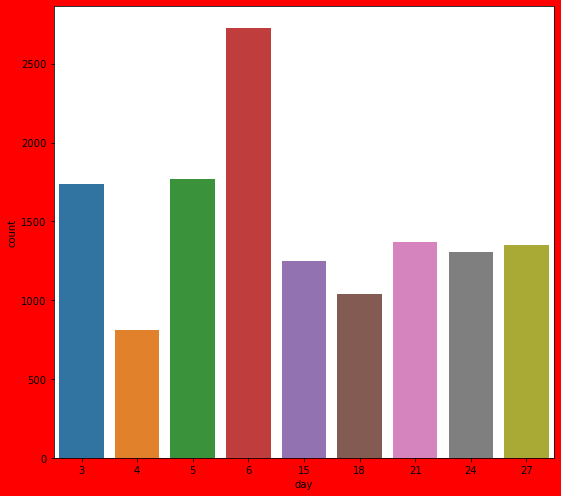

In [58]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['day']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['day'])
    plotnumber += 1
plt.tight_layout()
print(data['day'].value_counts())

6     3186
3     2756
5     2563
9     1769
1     1349
12    1214
4      517
Name: month, dtype: int64


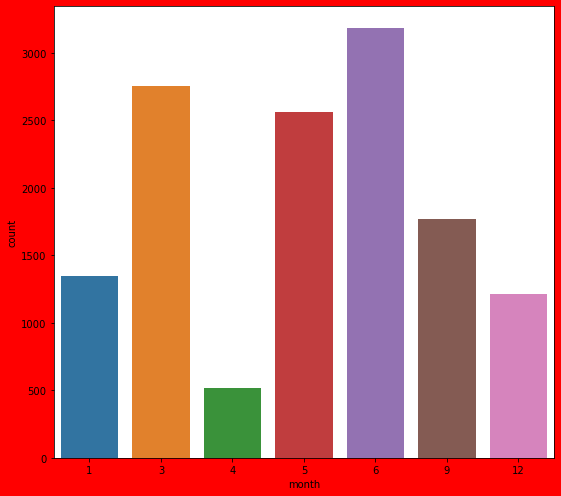

In [59]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['month']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['month'])
    plotnumber += 1
plt.tight_layout()
print(data['month'].value_counts())

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  float64
 4   Total_Stops      13354 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   New              13354 non-null  object 
 8   day              13354 non-null  int64  
 9   month            13354 non-null  int64  
 10  Dep_hour         13354 non-null  int64  
 11  Dep_min          13354 non-null  int64  
 12  Arrival_hour     13354 non-null  int64  
 13  Arrival_minute   13354 non-null  int64  
 14  Route1           13354 non-null  float64
 15  Route2           13354 non-null  float64
 16  Route3           13354 non-null  float64
 17  Route4      

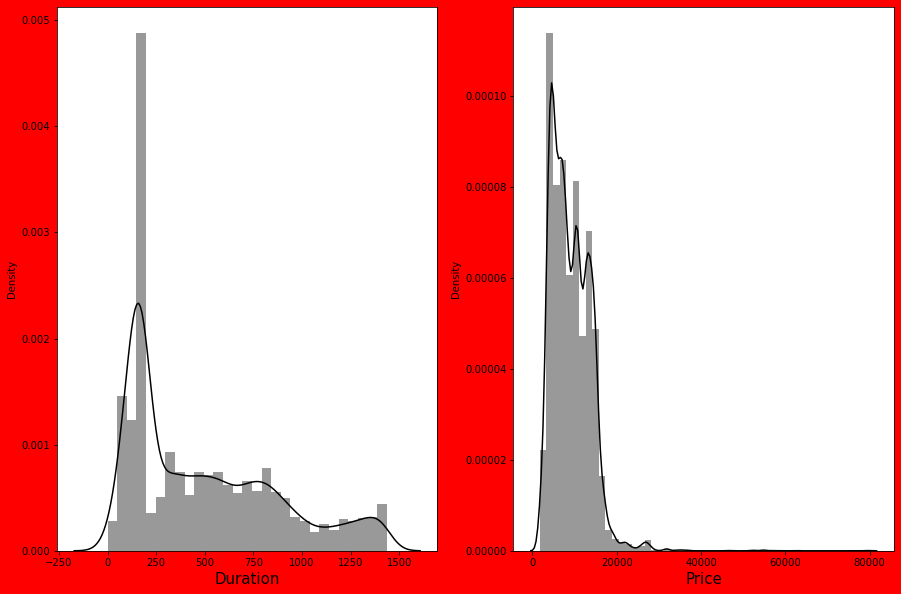

In [61]:
plt.figure(figsize = (15,10), facecolor = 'red')
plotnumber = 1

for column in data[['Duration','Price',]]: #we have only 2 columns which has continous data 
    if plotnumber <=2:
        ax = plt.subplot(1,2,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

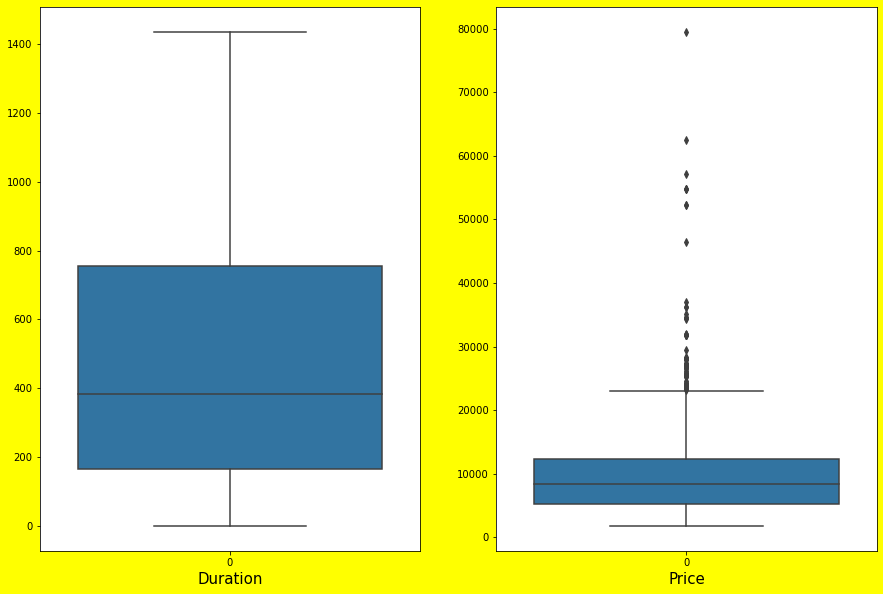

In [62]:
plt.figure(figsize=(15,10),facecolor='yellow')
graph=1
for column in data[['Duration','Price',]]:
    if graph<=2:
        plt.subplot(1,2,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

As pric is outcome so we gonna leave as it is 

In [63]:
data.skew()

Duration           0.824423
Total_Stops       -0.392524
Price              1.812552
day                0.389526
month              0.621749
Dep_hour           0.109087
Dep_min            0.159397
Arrival_hour      -0.384591
Arrival_minute     0.111711
Route1             0.434386
Route2             1.038416
Route3             2.297209
Route4             3.906588
Route5            22.390677
dtype: float64

In [64]:
scaler=PowerTransformer(method='yeo-johnson')

In [65]:
data[['Duration']] = scaler.fit_transform(data[['Duration']].values)

In [66]:
data.skew()

Duration          -0.039250
Total_Stops       -0.392524
Price              1.812552
day                0.389526
month              0.621749
Dep_hour           0.109087
Dep_min            0.159397
Arrival_hour      -0.384591
Arrival_minute     0.111711
Route1             0.434386
Route2             1.038416
Route3             2.297209
Route4             3.906588
Route5            22.390677
dtype: float64

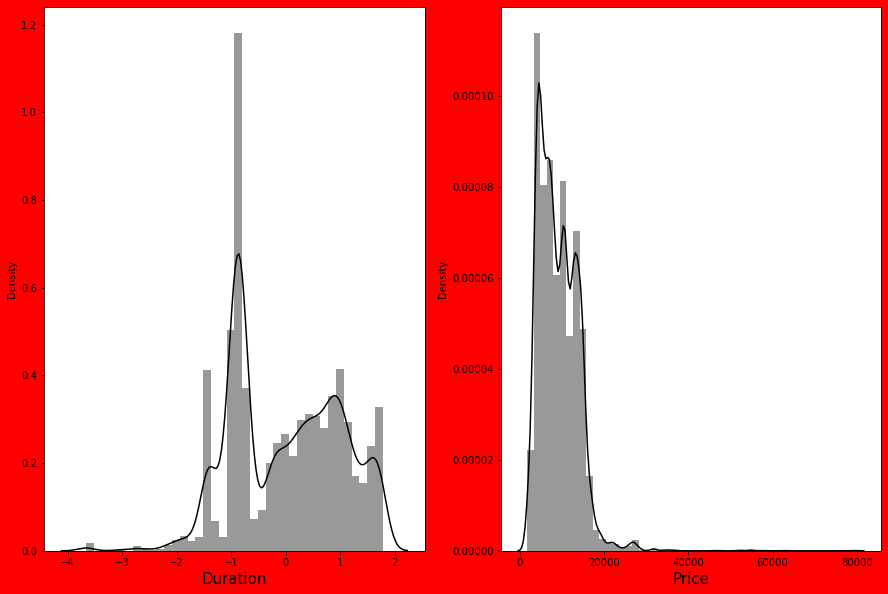

In [67]:
plt.figure(figsize = (15,10), facecolor = 'red')
plotnumber = 1

for column in data[['Duration','Price',]]: #we have only 2 columns which has continous data 
    if plotnumber <=2:
        ax = plt.subplot(1,2,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

How ever we gonna use PCA method which will rmove the skweness and corelaion  by default 

In [68]:
one_hot_columns = ['Additional_Info','Airline', 'Destination','Source']
data_new = pd.get_dummies(data = data,columns=one_hot_columns)

In [69]:
pd.set_option('display.max_columns', None)
data_new

,Duration,Total_Stops,Price,New,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Route1,Route2,Route3,Route4,Route5,Additional_Info_1 Short layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,-0.837340,0.0,3897.0,Train,24,3,22,20,1,10,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0.182267,1.0,7662.0,Train,5,1,5,50,13,15,1.0,1.0,1.0,1.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1.431627,1.0,13882.0,Train,6,9,9,25,4,25,2.0,2.0,2.0,2.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,-0.176733,2.0,6218.0,Train,5,12,18,5,23,30,1.0,3.0,3.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,-0.319000,2.0,13302.0,Train,3,1,16,50,21,35,0.0,3.0,4.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1.781988,2.0,NaN,Test,6,6,20,30,20,25,1.0,17.0,3.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
13350,-0.923435,0.0,NaN,Test,27,3,14,20,16,55,1.0,4.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
13351,0.042940,2.0,NaN,Test,3,6,21,50,4,25,2.0,5.0,5.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
13352,1.114249,2.0,NaN,Test,3,6,4,0,19,15,2.0,5.0,5.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [70]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Duration                                      13354 non-null  float64
 1   Total_Stops                                   13354 non-null  float64
 2   Price                                         10683 non-null  float64
 3   New                                           13354 non-null  object 
 4   day                                           13354 non-null  int64  
 5   month                                         13354 non-null  int64  
 6   Dep_hour                                      13354 non-null  int64  
 7   Dep_min                                       13354 non-null  int64  
 8   Arrival_hour                                  13354 non-null  int64  
 9   Arrival_minute                                13354 non-null 

# Scalling

In [71]:
Y = data_new['Price']
X = data_new.drop('Price',axis = 1)

In [72]:
#as we have train and test data in column new so we gonna keep it seprate so we can add it after PCA
new = X['New']

X.drop('New',axis =1 ,inplace = True)

In [73]:
scaler=StandardScaler()
x = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
x.head()

,Duration,Total_Stops,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Route1,Route2,Route3,Route4,Route5,Additional_Info_1 Short layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,-0.837340,-1.333479,1.307001,-0.850161,1.653879,-0.239345,-1.797602,-0.885564,-1.399840,-1.183070,-1.009301,-0.365842,-0.057037,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,-0.443148,-0.135281,2.051406,-0.743499,-0.363558,-0.288488,-0.008654,-0.219345,-0.605324,-0.860590,1.962771,-0.266091,-0.188027,1.962771,-0.188027,-0.860590,-0.605324,-0.266091
1,0.182267,-0.233517,-0.862038,-1.517144,-1.309829,1.353715,-0.057434,-0.583615,-0.457867,-1.041591,-0.668555,0.871295,-0.057037,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,2.256580,-0.135281,-0.487470,-0.743499,-0.363558,-0.288488,-0.008654,-0.219345,1.652007,-0.860590,-0.509484,-0.266091,-0.188027,-0.509484,-0.188027,-0.860590,1.652007,-0.266091
2,1.431627,-0.233517,-0.747878,1.150788,-0.612486,0.026165,-1.362560,0.020282,0.484107,-0.900111,-0.327809,2.108431,-0.057037,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,-0.443148,-0.135281,-0.487470,1.344992,-0.363558,-0.288488,-0.008654,-0.219345,-0.605324,1.161993,-0.509484,-0.266091,-0.188027,-0.509484,-0.188027,1.161993,-0.605324,-0.266091
3,-0.176733,0.866444,-0.862038,2.151262,0.956536,-1.035875,1.392705,0.322231,-0.457867,-0.758632,0.012937,-0.365842,-0.057037,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,-0.443148,-0.135281,2.051406,-0.743499,-0.363558,-0.288488,-0.008654,-0.219345,1.652007,-0.860590,-0.509484,-0.266091,-0.188027,-0.509484,-0.188027,-0.860590,1.652007,-0.266091
4,-0.319000,0.866444,-1.090358,-1.517144,0.607864,1.353715,1.102677,0.624180,-1.399840,-0.758632,0.353683,-0.365842,-0.057037,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,-0.443148,-0.135281,2.051406,-0.743499,-0.363558,-0.288488,-0.008654,-0.219345,-0.605324,-0.860590,1.962771,-0.266091,-0.188027,1.962771,-0.188027,-0.860590,-0.605324,-0.266091


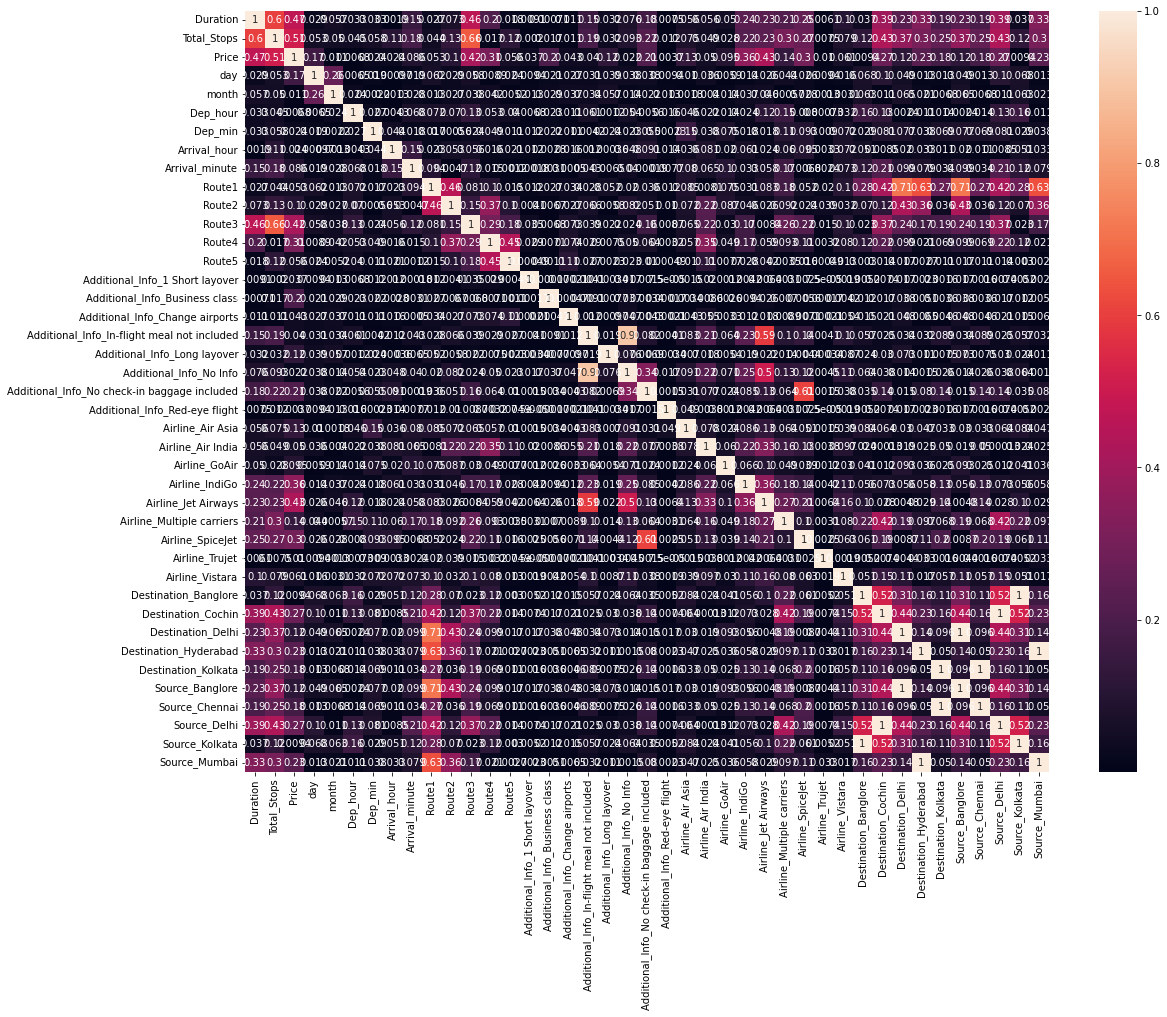

In [74]:
data_corr=data_new.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

As we got so many features we gonna use PCA

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca=PCA()
pca.fit_transform(x)

array([[-3.37655505e+00, -6.36388452e-01, -2.64390231e+00, ...,
        -1.22319026e-18,  9.32449198e-17,  1.29494092e-15],
       [-8.74172987e-01, -6.50780706e-01,  1.22502646e+00, ...,
         2.23807017e-16,  1.78370719e-16, -4.69428109e-16],
       [ 1.98763679e+00, -1.92322395e-01, -6.55908383e-01, ...,
         7.78421158e-17, -2.94589895e-16, -3.54767139e-16],
       ...,
       [ 1.71139308e+00, -2.93808237e-01, -3.06113497e-01, ...,
         9.90496039e-18, -3.35627810e-18,  1.53348324e-16],
       [ 2.49726155e+00,  4.40833967e-02, -1.04679497e+00, ...,
         3.20111614e-17, -1.42506928e-16,  7.29255067e-18],
       [ 2.90696440e+00,  9.87168103e-02, -1.60785458e+00, ...,
         3.88044504e-17, -1.90390000e-17,  4.98192360e-18]])

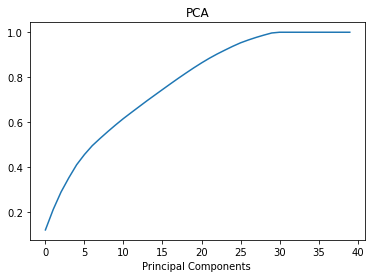

In [77]:
#lets plot scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))#cumsum=cummulative summention
plt.xlabel('Principal Components ')
plt.title('PCA')
plt.show()
#explained_variance_ratio_ = how much data variance u can explain if ur using on component 
#cumsum = it will increase its value by adding one + another data then another and so on 

30 columns can give 95 and 95+ accuracy

In [78]:
pca=PCA(n_components=30)
new_pcomp=pca.fit_transform(x)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-3.376555,-0.636388,-2.643902,-0.179604,0.283697,-0.979542,-0.307882,-1.726518,-0.451806,-0.912631,1.250513,0.851902,-0.449389,-0.123056,-0.169051,-0.092846,0.279824,-0.084311,0.313434,0.808834,-0.752524,-1.226162,0.405050,0.943191,-0.991182,0.463908,-0.627074,-0.275649,-0.065338,-0.017706
1,-0.874173,-0.650781,1.225026,2.301034,0.076747,0.946780,0.558267,-0.209173,-0.378870,1.036666,0.529911,-0.247553,-0.825935,-0.700764,0.199397,-0.056656,-0.010814,0.345519,-0.270461,-1.431524,0.552059,-0.326020,0.324248,-0.619648,0.097116,2.420739,0.454215,1.423199,-0.031221,-0.113650
2,1.987637,-0.192322,-0.655908,-0.526318,0.243550,0.831065,-0.321926,-0.532657,1.989319,-1.171422,-0.294935,-0.056576,-0.039577,0.072589,0.414792,-0.042832,0.017649,-0.362580,-0.388119,0.231094,0.518763,-0.634445,1.331987,-0.036158,1.183660,0.053549,0.340830,1.552076,-0.735224,-0.429040
3,-0.919834,-0.948389,1.718191,2.275832,-0.773739,-1.352701,-0.922101,1.164388,0.785720,-1.109144,1.089879,0.620144,0.263258,-0.703752,-0.489323,-0.012701,-0.011512,0.492538,0.462545,0.936836,-0.520304,1.234504,-0.712456,0.514317,-0.092678,-1.007179,0.061257,0.379091,-0.310932,-0.305159
4,-2.274159,-1.349089,-2.262210,0.590991,0.722760,-0.303448,-0.650699,0.396438,-0.169525,1.008474,1.577411,-0.040052,-0.162077,-0.319462,-0.312293,-0.107609,0.070225,0.075954,0.104308,0.753183,-0.024568,-0.802859,-2.419043,-1.202755,-0.272950,-0.299151,-0.302990,-0.238807,-0.042005,0.033232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,0.140351,-1.076591,2.348800,2.799477,0.234228,0.607139,-0.101507,0.598070,-0.158153,0.304391,-0.585828,-0.052632,-1.145943,-0.724870,-0.277919,-0.226810,0.129355,0.590720,1.022985,-0.291639,-0.201210,-0.657125,-0.683218,-0.004287,-0.342722,-0.010542,-0.791885,0.466046,1.499977,0.209164
13350,-2.322195,0.102172,1.158152,1.822670,-0.658650,-1.625213,-0.168348,-2.330585,-1.053251,-0.269260,1.019112,-0.096224,0.416442,-0.336380,-0.102395,0.113239,0.016574,0.103330,-0.152790,0.288083,0.057285,1.088753,-0.798210,0.556708,1.008379,0.108742,-0.097751,0.495292,-0.365745,-0.212817
13351,1.711393,-0.293808,-0.306113,-0.649755,-0.148947,-0.277058,-0.333824,-0.331814,1.881251,0.011183,-0.332266,-0.190248,-0.255432,0.239721,-0.088394,-0.192096,0.042710,-0.306511,0.728351,1.081181,-0.120494,-1.811663,-0.408320,-0.312719,0.214290,0.549550,1.421119,-0.216229,-0.342410,0.713898
13352,2.497262,0.044083,-1.046795,1.152198,0.134861,0.429511,0.189552,1.100486,-0.205982,-0.665410,-0.237945,-0.265398,-0.880690,-0.475660,-0.037038,0.042570,-0.037697,0.675093,0.406785,-1.398730,0.390518,0.781340,0.215544,-0.966686,-0.877440,-0.197621,1.196903,1.077220,0.776461,-0.090223


In [79]:
#adding the column where data was distrubated between train and test 
princi_comp['New'] = new

In [80]:
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,New
0,-3.376555,-0.636388,-2.643902,-0.179604,0.283697,-0.979542,-0.307882,-1.726518,-0.451806,-0.912631,1.250513,0.851902,-0.449389,-0.123056,-0.169051,-0.092846,0.279824,-0.084311,0.313434,0.808834,-0.752524,-1.226162,0.405050,0.943191,-0.991182,0.463908,-0.627074,-0.275649,-0.065338,-0.017706,Train
1,-0.874173,-0.650781,1.225026,2.301034,0.076747,0.946780,0.558267,-0.209173,-0.378870,1.036666,0.529911,-0.247553,-0.825935,-0.700764,0.199397,-0.056656,-0.010814,0.345519,-0.270461,-1.431524,0.552059,-0.326020,0.324248,-0.619648,0.097116,2.420739,0.454215,1.423199,-0.031221,-0.113650,Train
2,1.987637,-0.192322,-0.655908,-0.526318,0.243550,0.831065,-0.321926,-0.532657,1.989319,-1.171422,-0.294935,-0.056576,-0.039577,0.072589,0.414792,-0.042832,0.017649,-0.362580,-0.388119,0.231094,0.518763,-0.634445,1.331987,-0.036158,1.183660,0.053549,0.340830,1.552076,-0.735224,-0.429040,Train
3,-0.919834,-0.948389,1.718191,2.275832,-0.773739,-1.352701,-0.922101,1.164388,0.785720,-1.109144,1.089879,0.620144,0.263258,-0.703752,-0.489323,-0.012701,-0.011512,0.492538,0.462545,0.936836,-0.520304,1.234504,-0.712456,0.514317,-0.092678,-1.007179,0.061257,0.379091,-0.310932,-0.305159,Train
4,-2.274159,-1.349089,-2.262210,0.590991,0.722760,-0.303448,-0.650699,0.396438,-0.169525,1.008474,1.577411,-0.040052,-0.162077,-0.319462,-0.312293,-0.107609,0.070225,0.075954,0.104308,0.753183,-0.024568,-0.802859,-2.419043,-1.202755,-0.272950,-0.299151,-0.302990,-0.238807,-0.042005,0.033232,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,0.140351,-1.076591,2.348800,2.799477,0.234228,0.607139,-0.101507,0.598070,-0.158153,0.304391,-0.585828,-0.052632,-1.145943,-0.724870,-0.277919,-0.226810,0.129355,0.590720,1.022985,-0.291639,-0.201210,-0.657125,-0.683218,-0.004287,-0.342722,-0.010542,-0.791885,0.466046,1.499977,0.209164,Test
13350,-2.322195,0.102172,1.158152,1.822670,-0.658650,-1.625213,-0.168348,-2.330585,-1.053251,-0.269260,1.019112,-0.096224,0.416442,-0.336380,-0.102395,0.113239,0.016574,0.103330,-0.152790,0.288083,0.057285,1.088753,-0.798210,0.556708,1.008379,0.108742,-0.097751,0.495292,-0.365745,-0.212817,Test
13351,1.711393,-0.293808,-0.306113,-0.649755,-0.148947,-0.277058,-0.333824,-0.331814,1.881251,0.011183,-0.332266,-0.190248,-0.255432,0.239721,-0.088394,-0.192096,0.042710,-0.306511,0.728351,1.081181,-0.120494,-1.811663,-0.408320,-0.312719,0.214290,0.549550,1.421119,-0.216229,-0.342410,0.713898,Test
13352,2.497262,0.044083,-1.046795,1.152198,0.134861,0.429511,0.189552,1.100486,-0.205982,-0.665410,-0.237945,-0.265398,-0.880690,-0.475660,-0.037038,0.042570,-0.037697,0.675093,0.406785,-1.398730,0.390518,0.781340,0.215544,-0.966686,-0.877440,-0.197621,1.196903,1.077220,0.776461,-0.090223,Test


In [81]:
princi_comp['New'].unique()

array(['Train', 'Test'], dtype=object)

as we got 2 different data i.e train and test where test data doest have price which we gonna predict , so we gonna seprate them 

In [82]:
X_train_original = princi_comp.loc[princi_comp["New"] == "Train"]
X_test_original = princi_comp.loc[princi_comp["New"]=="Test"]
print('X Shape--> ',X_train_original.shape)
print('   ')
print('Y Shape--> ',Y.shape)

X Shape-->  (10683, 31)
   
Y Shape-->  (13354,)


In [83]:
Y.isnull().sum()

2671

lets drop the null value

In [84]:
Y.dropna(inplace=True)
Y.shape

(10683,)

In [85]:
print('X Shape--> ',X_train_original.shape)
print('   ')
print('Y Shape--> ',Y.shape)

X Shape-->  (10683, 31)
   
Y Shape-->  (10683,)


Now its equal 

In [86]:
# we have used New column to divide the data so we can drop off as its object data type
X_train_original.drop('New',axis = 1,inplace  =True)
X_test_original.drop('New',axis = 1,inplace  =True)

In [87]:
#reset the index
X_train_original.reset_index(drop =True, inplace=True)
X_test_original.reset_index(drop = True, inplace=True)

In [88]:
x_train,x_test,y_train,y_test = train_test_split(X_train_original,Y,test_size=.25,random_state= 355 )

In [89]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=ada.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)
print('mean absolute error :',mean_absolute_error(y_test,y_test_pred))
print('mean squared error : ', mean_squared_error(y_test,y_test_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train accuracy  - 0.11774619312018875
Test accuracy  -  -0.008707740469497738
mean absolute error : 3833.3506872878847
mean squared error :  20393697.891970094
root mean squared error : 4515.938207279866


In [90]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=lr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)
print('mean absolute error :',mean_absolute_error(y_test,y_test_pred))
print('mean squared error : ', mean_squared_error(y_test,y_test_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train accuracy  - 0.6350117225995537
Test accuracy  -  -396053.3806101569
mean absolute error : 56490.57860056397
mean squared error :  8007288001176.115
root mean squared error : 2829715.180221521


In [91]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=dt.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)
print('mean absolute error :',mean_absolute_error(y_test,y_test_pred))
print('mean squared error : ', mean_squared_error(y_test,y_test_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train accuracy  - 0.9964060584851584
Test accuracy  -  0.629552567362923
mean absolute error : 1346.3036315986521
mean squared error :  7489575.744248929
root mean squared error : 2736.7089257443745


In [92]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=knn.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)
print('mean absolute error :',mean_absolute_error(y_test,y_test_pred))
print('mean squared error : ', mean_squared_error(y_test,y_test_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train accuracy  - 0.8426104703109137
Test accuracy  -  0.8149146419918092
mean absolute error : 1169.7425683264694
mean squared error :  3741990.592527143
root mean squared error : 1934.4225475648136


In [93]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=gbr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)
print('mean absolute error :',mean_absolute_error(y_test,y_test_pred))
print('mean squared error : ', mean_squared_error(y_test,y_test_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train accuracy  - 0.7844235478507553
Test accuracy  -  0.7784968648774712
mean absolute error : 1474.4076373784524
mean squared error :  4478272.386123007
root mean squared error : 2116.1928990815104


In [94]:
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=svr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)
print('mean absolute error :',mean_absolute_error(y_test,y_test_pred))
print('mean squared error : ', mean_squared_error(y_test,y_test_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train accuracy  - 0.03721878593620931
Test accuracy  -  0.0535083336601202
mean absolute error : 3399.8713052734065
mean squared error :  19135835.213893216
root mean squared error : 4374.452561623365


In [95]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=rf.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

print('mean absolute error :',mean_absolute_error(y_test,y_test_pred))
print('mean squared error : ', mean_squared_error(y_test,y_test_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,y_test_pred)))


Train accuracy  - 0.9685678618831846
Test accuracy  -  0.838051585142695
mean absolute error : 1091.704366176878
mean squared error :  3274216.023311255
root mean squared error : 1809.4794896077863


# RandomForestRegressor is giving the best accuracy

In [96]:
from sklearn.model_selection import GridSearchCV

In [98]:
params ={'n_estimators':[100,200,300],
        'criterion':['mse','mae'],
        'min_samples_split':[2,3],
        'bootstrap':[True,False],
        'max_features':['auto','sqrt','log2']} 

In [99]:
RF_grid=GridSearchCV(RandomForestRegressor(),params,cv=4)

In [100]:
RF_grid.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': ['auto'], 'min_samples_split': [2],
                         'n_estimators': [100]})

In [101]:
RF_grid.best_estimator_

RandomForestRegressor()

In [110]:
RF_model=RandomForestRegressor(criterion='mse', max_features='auto', n_jobs=-1,bootstrap='True',min_samples_split = 2,n_estimators = 300)
RF_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap='True', n_estimators=300, n_jobs=-1)

In [111]:
pred=RF_model.predict(x_test)

In [112]:
print('R2_Score:',r2_score(y_test,pred)*100)

R2_Score: 84.08654188891222


we can see the score have been increased by 1 % likely 

In [113]:
import pickle

In [114]:
pickle.dump(RF_model,open('Flight Price Prediction','wb'))
